<h1 style="text-align:center;">House Price Prediction in King County, USA: A Linear Regression Study</h1>
<h2 style="text-align:center;">Modesta Uzochukwu</h2>


# Introduction

This study examines the factors influencing house prices in King County, USA, using publicly available housing data from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=linkedin). The goal is to understand which property characteristics most strongly affect price and to develop a predictive model that can estimate home values based on these features. The analysis focuses on key variables including total living area (sqft_living), house grade, bathrooms, view, and waterfront access, among others.

To achieve this, a combination of exploratory data analysis, correlation studies, and regression modeling was employed. Simple linear regression was first used to evaluate individual predictors, checking key assumptions such as linearity, homoscedasticity, normality of residuals, and absence of multicollinearity. The top predictors were then combined in a multiple linear regression model, which was trained and tested to evaluate predictive performance using metrics like R², Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

The study addresses three research questions: (1) Which property features most strongly influence house prices? (2) How do premium features like waterfront and view affect prices? (3) To what extent can house prices in King County be accurately predicted using multiple linear regression? 

Findings from this analysis provide insights for home buyers, sellers, and real estate professionals, while also establishing a robust baseline for future predictive modeling in the housing market.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
#load necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Load the csv:


In [2]:
file_path = r"C:\Users\modes\Documents\data analysis\kc_house_data.csv"
# Load into a DataFrame
df = pd.read_csv(file_path)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


To better understand the dataset and prepare it for modeling, I first examined how each variable is distributed. This helps identify trends, anomalies, and data quality issues. 

Now, let’s look at the distribution of variables in the dataset:

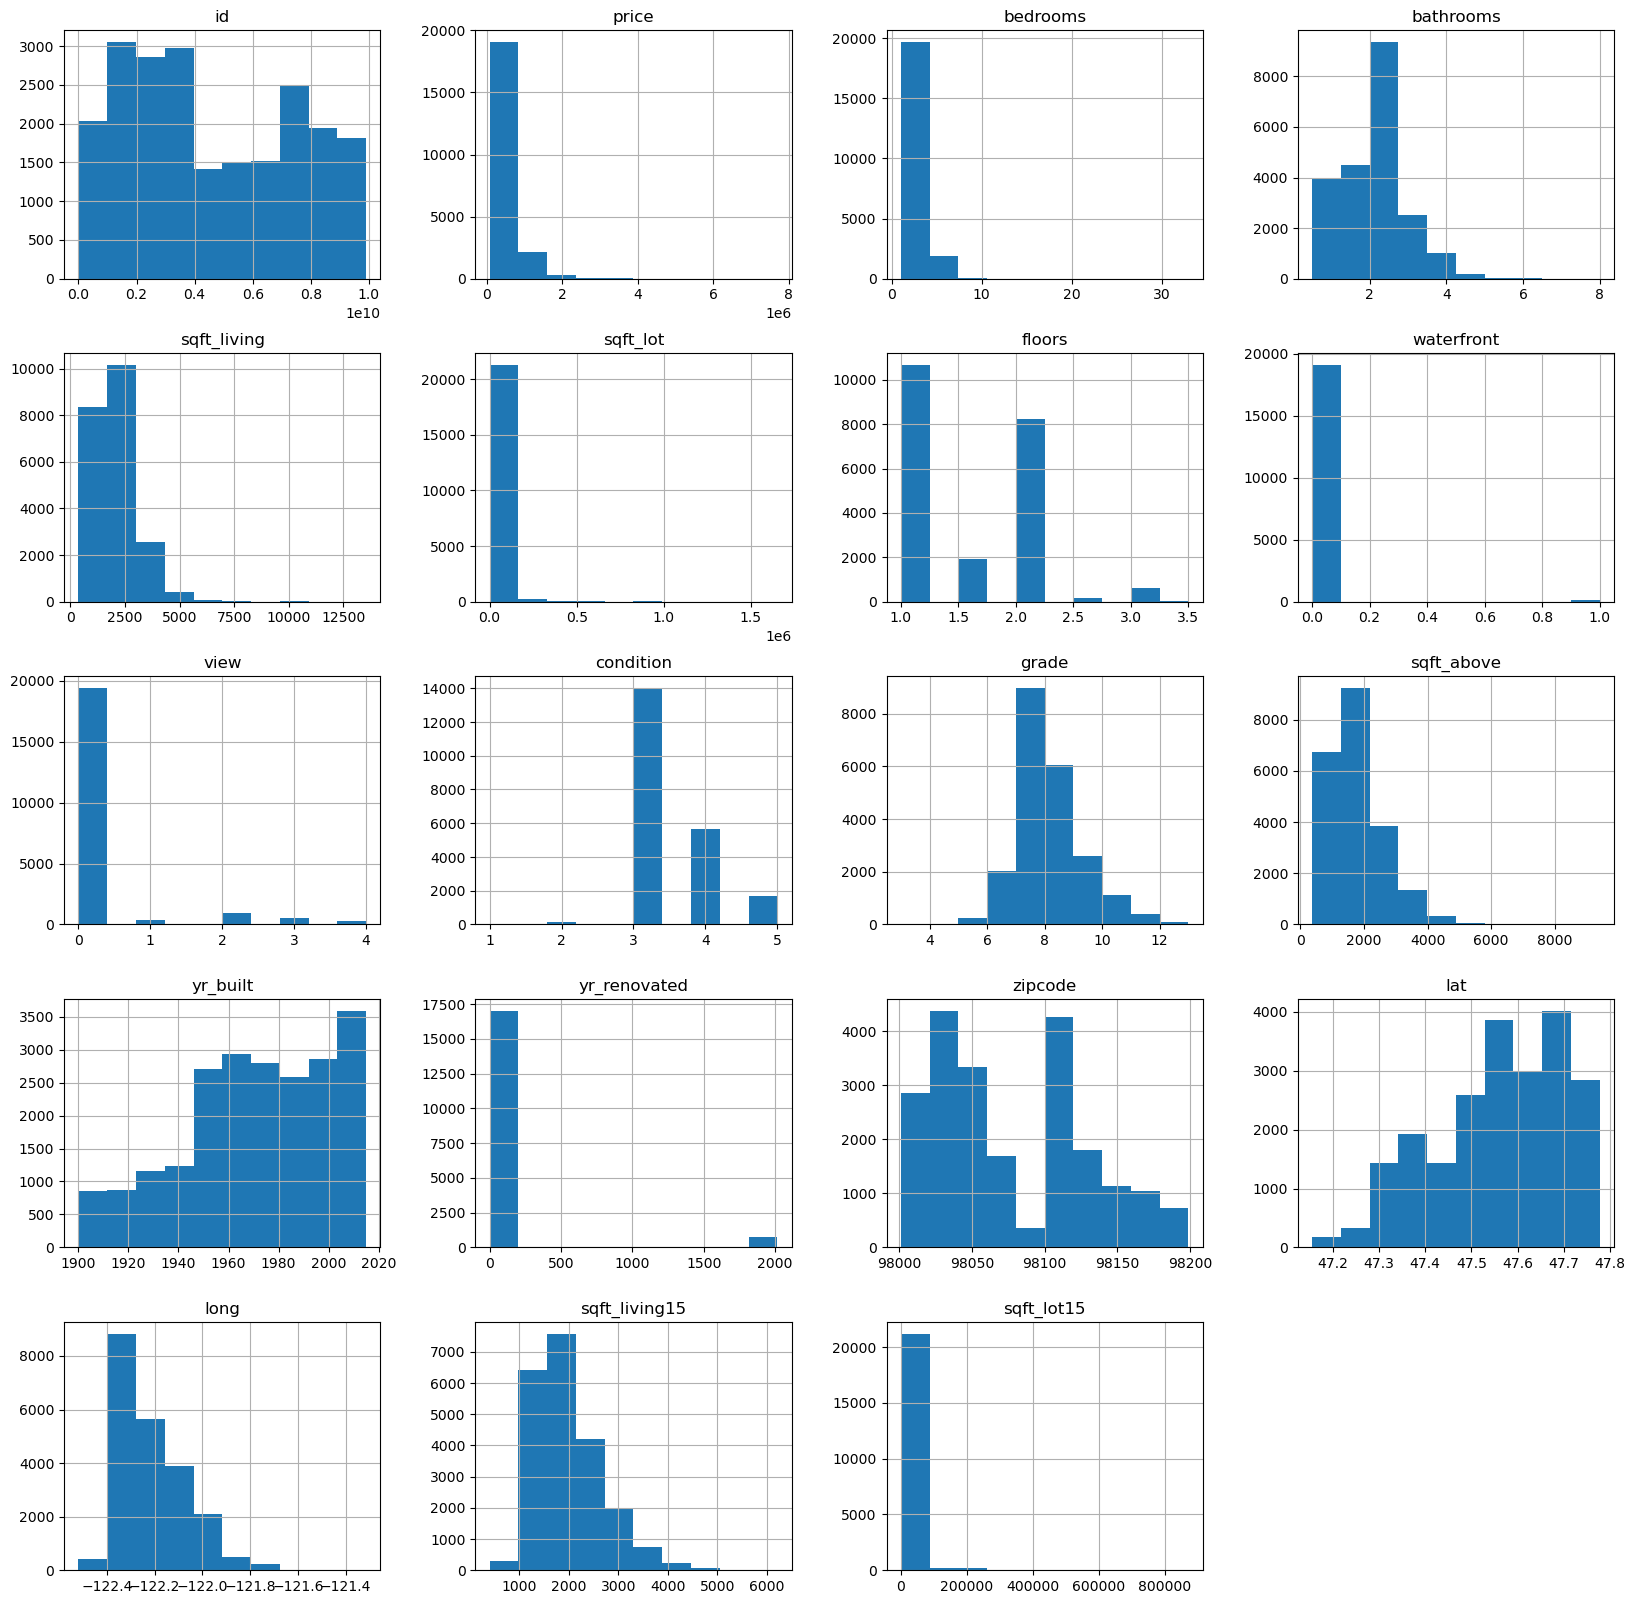

In [8]:
df.hist(figsize=(20,20));

The distribution analysis shows that several variables are highly skewed and exist on very different scales. This matters because skewness can amplify the effect of outliers, and inconsistent scales may distort the interpretation of regression coefficients. While linear regression does not require predictors to be normally distributed, the assumptions about residuals and variance must still be respected. Recognizing this early allows me to plan preprocessing steps such as scaling, log transformations, or outlier treatment to improve the stability and reliability of the model."

# Module 2: Data Wrangling


In this module, I cleaned and prepared the dataset for analysis. This included handling missing values, checking data types, and ensuring the variables were ready for analysis and modeling.

In [9]:
#check for the percentage of missing data per column
df.isnull().mean() * 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [10]:
#let us see the number of missing values for the 3 columns
df[['yr_renovated', 'waterfront', 'view']].isnull().sum()

yr_renovated    3842
waterfront      2376
view              63
dtype: int64

The missingness in this dataset appears informative rather than random. For example, <code>'yr_renovated'</code> (17.8% missing) already uses 0 to indicate properties that have never been renovated. Therefore, missing entries can reasonably be replaced with 0 to maintain consistency. For <code>'waterfront'</code> (11.0% missing), the gaps are likely homes without waterfront access, so these will be encoded as 0 to represent 'no waterfront'. <code>'The view'</code> column (0.3% missing) has only a handful of gaps, which can be safely imputed using the mode to avoid unnecessary data loss.

In [11]:
# Replace missing values in 'yr_renovated' with 0, 
# since NaN indicates no renovation. 
# This keeps the column numeric and consistent, 
# while preserving the distinction between renovated and non-renovated homes.
df['yr_renovated'] = df['yr_renovated'].fillna(0)


In [12]:
# Replace missing values in 'waterfront' with 0, 
# assuming NaN indicates the property does not have waterfront access. 
# This ensures waterfront homes (value = 1) remain distinguishable, 
# while treating missing entries consistently as non-waterfront.
df['waterfront'] = df['waterfront'].fillna(0)


In [13]:
# Impute missing values in 'view' with the mode (most frequent value). 
# Since 'view' is an ordinal variable (0–4), mean imputation would not be meaningful. 
# Mode imputation preserves realistic categories and prevents data loss.
df['view'] = df['view'].fillna(df['view'].mode()[0])


In [15]:
# Re-check for missing values across the dataset 
# to confirm that all missing data has been handled 
# and the data wrangling process is complete.
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

After imputing missing values for yr_renovated, waterfront, and view, I verified the dataset again to ensure there are no remaining NaN entries. This confirms the data wrangling stage is complete, and the dataset is ready for further analysis and modeling.



Drop the columns <code>"id"</code> from the table using the method <code>drop()</code>


In [14]:
# Drop the 'id' column since it is only a unique identifier 
# and does not provide predictive value for the regression model.
df.drop(['id'], axis=1, inplace = True)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Checking for Outliers

Exploratory analysis revealed extreme values in bedrooms and bathrooms (e.g., 33 bedrooms, 8 bathrooms) that are unrealistic for single-family homes. Such cases are rare and not representative of the housing market in King County. Including them could distort the regression model by exaggerating the effect of these features on price. To maintain focus on typical residential properties, I removed rows where bedrooms exceeded 10 or bathrooms exceeded 5.


In [15]:
# Count how many rows exceed the thresholds
outliers = df[(df['bedrooms'] > 10) | (df['bathrooms'] > 5)]
print("Number of outliers:", outliers.shape[0])
print("Percentage of dataset:", (outliers.shape[0] / df.shape[0]) * 100, "%")


Number of outliers: 45
Percentage of dataset: 0.2083622725378525 %


Before removing outliers, I first checked how many rows would be affected to ensure the dataset would not be significantly reduced. The results showed that only 45 rows (≈0.2% of the dataset) exceeded the thresholds of >10 bedrooms or >5 bathrooms. Since this is such a small fraction, removing these extreme cases will not distort the dataset and will instead improve the reliability of the regression model. After confirming this, I proceeded to drop the outliers.




In [16]:
# Remove rows with more than 10 bedrooms
df = df[df['bedrooms'] <= 10]


In [17]:
# Double-check that no rows with >10 bedrooms remain
print(df['bedrooms'].max())


10


After handling outliers in <code>'bedrooms'</code>, I applied the same check to <code>'bathrooms'</code>. Properties with more than 5 bathrooms were rare and unrealistic for single-family homes, so I removed them as well


In [18]:
# Check how many rows have more than 5 bathrooms
bathroom_outliers = df[df['bathrooms'] > 5]

print("Number of bathroom outliers:", bathroom_outliers.shape[0])
print("Percentage of dataset:", (bathroom_outliers.shape[0] / df.shape[0]) * 100, "%")


Number of bathroom outliers: 43
Percentage of dataset: 0.19912016670525584 %


The analysis showed 43 bathroom outliers (≈0.2% of the dataset) with more than 5 bathrooms. Since this represents only a very small fraction of the data, I removed them without significantly affecting the dataset size or integrity.

# Module 3: Exploratory Data Analysis


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Research Question 1:</h1>
<b>Which property features most strongly influence house prices?</b>
</divg County?

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix on numeric columns
corr = numeric_df.corr()

# Keep correlations with price, exclude price itself
corr_price_df = (
    corr['price']
    .drop('price')
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'Feature', 'price': 'Correlation'})
)

# Display result
print(corr_price_df)


          Feature  Correlation
0     sqft_living     0.701948
1           grade     0.667967
2      sqft_above     0.605401
3   sqft_living15     0.585274
4       bathrooms     0.525934
5            view     0.393502
6        bedrooms     0.316504
7             lat     0.306687
8      waterfront     0.264308
9          floors     0.256828
10   yr_renovated     0.117948
11       sqft_lot     0.089879
12     sqft_lot15     0.082848
13       yr_built     0.053964
14      condition     0.036029
15           long     0.022045
16        zipcode    -0.053408


In [20]:
# List to store highly correlated feature pairs
multicollinear_pairs = []

# Loop through numeric features to find pairs with correlation >= 0.8
for feature in corr.columns:
    for idx in corr.columns:
        if feature != idx and corr.loc[feature, idx] >= 0.8:
            pair = sorted([feature, idx])  # avoid duplicates
            if pair not in multicollinear_pairs:
                multicollinear_pairs.append(pair)

# Display the highly correlated pairs
print("Highly correlated feature pairs (r >= 0.8):")
for pair in multicollinear_pairs:
    print(f"{pair[0]} ↔ {pair[1]} : {corr.loc[pair[0], pair[1]]:.2f}")


Highly correlated feature pairs (r >= 0.8):
sqft_above ↔ sqft_living : 0.88


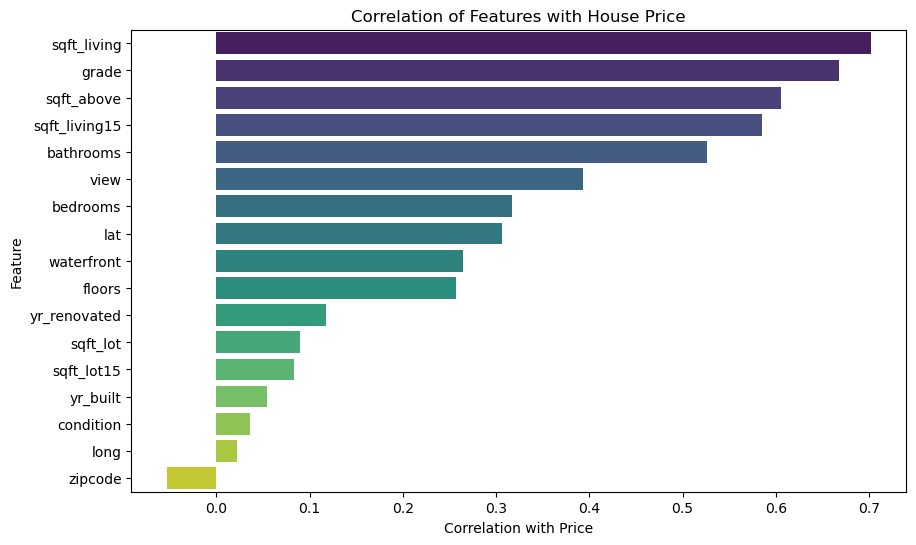

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the corr_price_df we created earlier
# Make the barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Correlation', y='Feature', data=corr_price_df, palette='viridis')
plt.title('Correlation of Features with House Price')
plt.xlabel('Correlation with Price')
plt.ylabel('Feature')
plt.show()


Analysis of correlations showed that total living area (<code>'sqft_living'</code>) has the strongest impact on <code>'price'</code>, followed by <code>'house grade'</code>, <code>'bathrooms'</code>, and living area of nearby houses (<code>'sqft_living15'</code>). A multicollinearity check revealed that sqft_living and sqft_above are highly correlated (r = 0.88), so only one should be used in a linear regression model to ensure stability. Features like year built <code>'(yr_built)'</code>, <code>'condition'</code> and <code>'zipcode'</code> have minimal effect on price.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Research Question 2:</h1>
<b>How do premium features like waterfront or view affect house price?</b>
</div

Average Price by Waterfront:
waterfront
0.0    5.322818e+05
1.0    1.717215e+06
Name: price, dtype: float64

Average Price by View Rating:
view
0.0    4.972022e+05
1.0    8.133733e+05
2.0    7.913904e+05
3.0    9.732852e+05
4.0    1.452466e+06
Name: price, dtype: float64


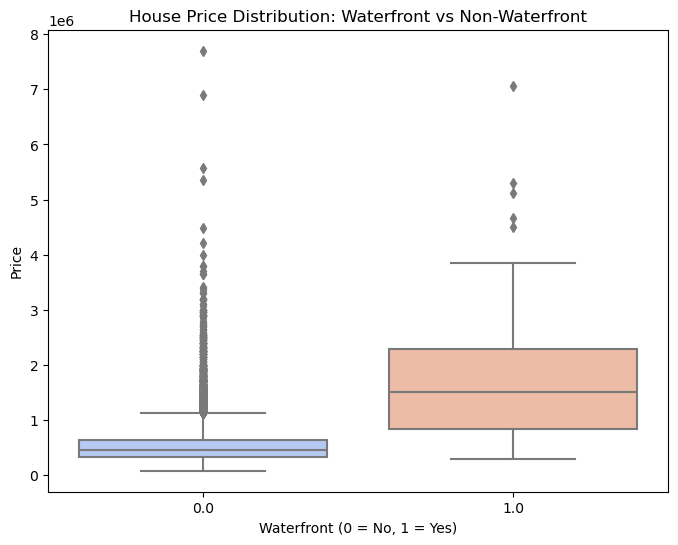

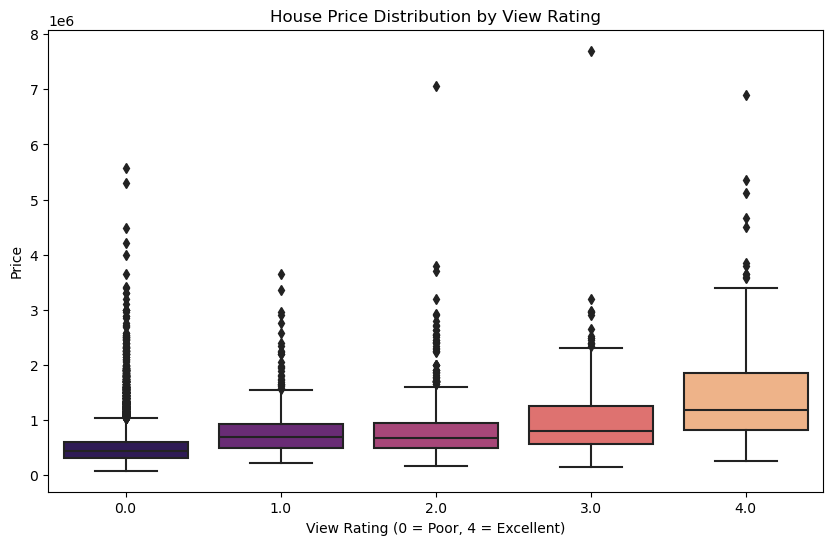

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Calculate average prices ---
avg_prices_waterfront = df.groupby('waterfront')['price'].mean()
avg_prices_view = df.groupby('view')['price'].mean()

print("Average Price by Waterfront:")
print(avg_prices_waterfront)
print("\nAverage Price by View Rating:")
print(avg_prices_view)

# --- Step 2: Visualize distributions with boxplots ---
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df, palette='coolwarm')
plt.title('House Price Distribution: Waterfront vs Non-Waterfront')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='view', y='price', data=df, palette='magma')
plt.title('House Price Distribution by View Rating')
plt.xlabel('View Rating (0 = Poor, 4 = Excellent)')
plt.ylabel('Price')
plt.show()


Analysis shows that houses with a <code>'waterfront'</code> sell for an average of **1,717,215 USD**, compared to **532,282 USD** for non-waterfront houses — more than three times higher on average. Similarly, higher <code>'view'</code> ratings are associated with higher prices: houses with a perfect view rating of 4 sell for an average of **1,452,466 USD**. while houses with poor views (0) sell for around **497,202 USD**.

# Module 4: Model Development


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Research Question 3:</h1>
<b>To what extent can house prices in King County be accurately predicted using multiple linear regression models?</b>
</div

Before finalizing the model, I selected the top five predictors based on domain knowledge and prior research (sqft_living, grade, bathrooms, sqft_living15, and view). I then fitted a multiple regression model using these variables simultaneously. Model assumptions were checked using residual plots, and multicollinearity was evaluated using VIF.

In [23]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select 5 predictors + target
X = df[['sqft_living', 'grade', 'bathrooms', 'sqft_living15', 'view']]
y = df['price']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit multiple linear regression
model = sm.OLS(y, X_const).fit()

# Print summary
print(model.summary())

# ---- Multicollinearity check (VIF) ----
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) 
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     5809.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:42:46   Log-Likelihood:            -2.9816e+05
No. Observations:               21595   AIC:                         5.963e+05
Df Residuals:                   21589   BIC:                         5.964e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -5.5e+05   1.29e+04    -42.752

The model achieved an **R²** of 0.574, meaning it explains about 57% of the variation in house prices in King County.

Among the predictors, <code>'sqft_living'</code>, <code>'grade'</code>, and <code>'view'</code> had strong positive effects on <code>'price'</code>, while <code>'bathrooms'</code> showed a negative coefficient after controlling for other features. <code>'sqft_living15'</code> was not statistically significant, suggesting that a house’s own size matters more than neighboring houses’ sizes.

**Variance Inflation Factor (VIF)** scores were all below 5, indicating no serious multicollinearity. This confirms the selected predictors are reliable and the model is stable.

While the residuals show some skewness due to very high-priced homes, the regression provides a solid baseline model for predicting house prices and highlights the most influential features.

# Module 5: Model Evaluation and Refinement

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target
X = df[['sqft_living', 'grade', 'bathrooms', 'sqft_living15', 'view']]
y = df['price']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Predict on test set
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² (test): {r2:.3f}")
print(f"RMSE (test): ${rmse:,.0f}")
print(f"MAE (test): ${mae:,.0f}")


R² (test): 0.566
RMSE (test): $238,849
MAE (test): $156,428


The multiple regression model explained about 57% of the variation in house prices (R² = 0.566). This means it captures just over half of the main factors that drive price differences. On average, the model’s predictions were off by about 156,000 USD per home (Mean Absolute Error, MAE), with typical deviations of around 239,000 USD (Root Mean Squared Error, RMSE). These results indicate that the model provides a solid baseline for predicting house prices in King County. However, since a significant portion of variation remains unexplained, adding more detailed factors such as neighborhood characteristics, proximity to amenities, or the quality of renovations would likely improve accuracy.

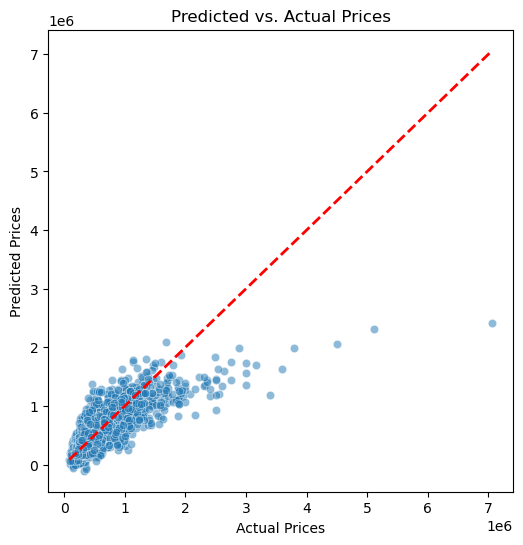

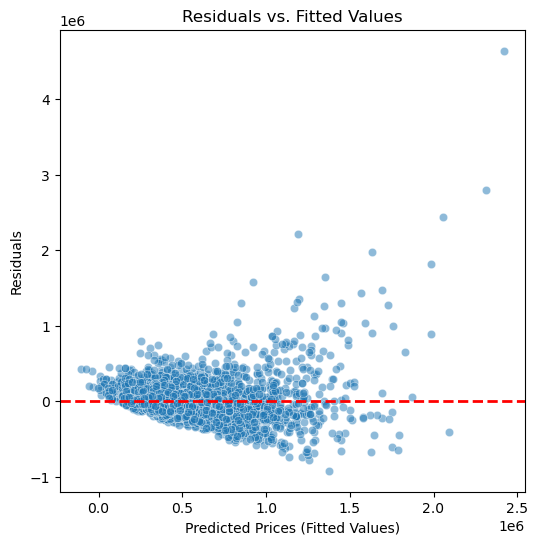

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

# -------------------------------
# 0. Add constant to X_test (important for statsmodels OLS)
# -------------------------------
X_test_sm = sm.add_constant(X_test)

# Get predictions and residuals
y_pred = model.predict(X_test_sm)
residuals = y_test - y_pred

# -------------------------------
# 1. Predicted vs Actual (Linearity check)
# -------------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

# -------------------------------
# 2. Residuals vs Fitted (Homoscedasticity check)
# -------------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Prices (Fitted Values)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()


Diagnostic plots showed that predictions tracked well with actual prices for mid-range homes but consistently underestimated luxury properties. The residuals vs. fitted plot revealed heteroscedasticity, as errors widened for higher-priced homes. This suggests the model is less reliable for expensive houses.

Potential refinements include applying a log transformation of price to reduce skewness, adding location-based variables (zipcode, latitude/longitude), and exploring regularized or tree-based models to capture non-linear relationships.

C:\Users\modes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


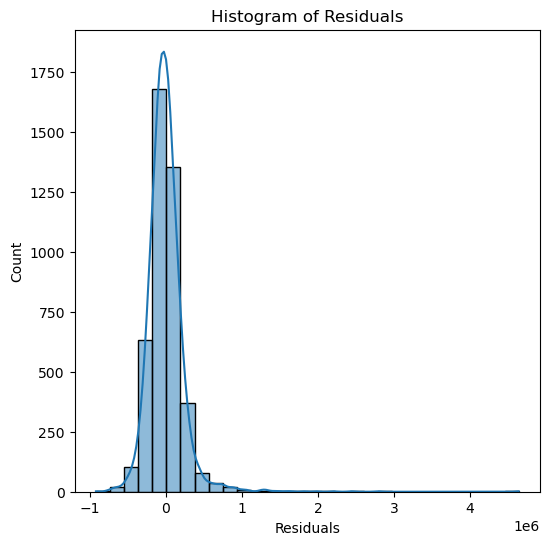

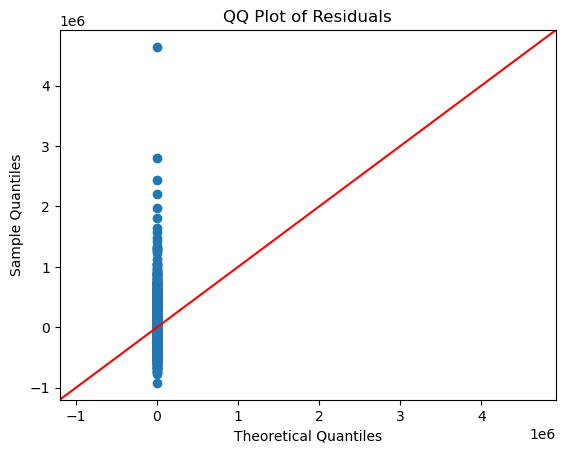

In [29]:
# -----------------------------------------------
# Normality check of residuals
# -----------------------------------------------
# The histogram with KDE helps us visually assess whether residuals 
# are approximately normally distributed. 
# The QQ plot further compares the distribution of residuals against 
# a theoretical normal distribution (45-degree line). 
# Deviations from normality can indicate potential violations 
# of regression assumptions.
# -----------------------------------------------


# Histogram of residuals
plt.figure(figsize=(6,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

# QQ plot for residuals
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()


The QQ plot shows clear deviations from the 45° line, indicating that the residuals are not normally distributed.

# Limitations of the Model

While the multiple linear regression model provided valuable insights, it has several limitations:

**Normality of residuals not satisfied:** The QQ plot revealed significant deviations from the 45° line, indicating that residuals are not normally distributed. This suggests the model struggles to capture the skewed distribution of house prices, especially in the higher-end market.

**Outliers and influential points:** Extreme values, such as luxury properties, heavily impact predictions and weaken overall model performance.

**Feature scope:** Only a limited set of predictors (e.g., square footage, bathrooms, grade, view) were included. Important variables such as location-specific amenities, year renovated, and economic factors may improve predictive power.

**Linearity assumption:** The model assumes linear relationships between predictors and price, which may oversimplify complex housing market dynamics.

# Conclusion

This project aimed to answer three research questions on King County house prices:

-**Which features are most highly correlated with house price?**

Square footage of living space, grade, and number of bathrooms showed the strongest positive correlations with price.

-**How do premium features like waterfront or view affect house price?**

Houses with premium features, particularly waterfront and desirable views, commanded significantly higher prices compared to standard homes.

-**To what extent can house prices in King County be accurately predicted using multiple linear regression?**

The regression model achieved a reasonable predictive performance, with solid R² values and interpretable coefficients. However, diagnostic checks revealed violations of regression assumptions, including non-normal residuals and heteroscedasticity, suggesting limited reliability for extreme price ranges.


Overall, the model captured the main drivers of housing prices and offered useful predictive capability, but it remains constrained by its linear form, sensitivity to outliers, and restricted set of features. Future work could explore non-linear models (e.g., Random Forests, Gradient Boosting) and a broader feature set to improve accuracy and robustness.

# References

**Dataset**: Kaggle King County House Sales

IBM Data Analysis with Python Final Assessment, 2023